Le domaine de la santé est l'un des domaines ou le machine learning peut apporter une plus value.En effet, plusieurs maladies pouvaient etre moins letales si on parvenait a les diagnostiques plus tot. Seulement, il y a une enorme quantite de donnees a traiter ce qui rend le diagnostic plus complexe et plus tardif. C est le cas du diabete. 
Lors de notre tavail de recherches nous avons utilise le jeu de donnees du diabete qui nous provient de l institut national du diabete et des maladies digestives renales. Il a pour objectif de predire le diagnostic d un patient pour savoir s il est diabetique ou pas.Plusieurs contraintes ont été placées sur la sélection de ces instances à partir d’une base de données plus grande. En particulier, tous les patients ici sont des femmes d’au moins 21 ans d’origine indienne

In [45]:
import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [47]:
Y=df['Outcome']
X=df.drop(['Outcome'],axis=1)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=(0.2),random_state=12)

In [49]:
# Appliquons un modele du plus proche voisins (K-NN)

#instanciation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn
#fitting du model
knn.fit(X_train,Y_train)
#prediction
pred_knn = knn.predict(X_test)

In [50]:
#optimisons le model knn
#parametre du grid
params=[
    {'n_neighbors':[4,5,7,9,10,30,20,6,2,1,3,34,15,16,24,28]},
    {'leaf_size':[2,4,3,10,5,1]}
    
]
##instantiation du model
knn_best_model=GridSearchCV(knn,params,cv=5,verbose=16)
knn_best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5; 1/22] START n_neighbors=4..............................................
[CV 1/5; 1/22] END ...............n_neighbors=4;, score=0.748 total time=   0.0s
[CV 2/5; 1/22] START n_neighbors=4..............................................
[CV 2/5; 1/22] END ...............n_neighbors=4;, score=0.732 total time=   0.0s
[CV 3/5; 1/22] START n_neighbors=4..............................................
[CV 3/5; 1/22] END ...............n_neighbors=4;, score=0.756 total time=   0.0s
[CV 4/5; 1/22] START n_neighbors=4..............................................
[CV 4/5; 1/22] END ...............n_neighbors=4;, score=0.724 total time=   0.0s
[CV 5/5; 1/22] START n_neighbors=4..............................................
[CV 5/5; 1/22] END ...............n_neighbors=4;, score=0.705 total time=   0.0s
[CV 1/5; 2/22] START n_neighbors=5..............................................
[CV 1/5; 2/22] END ...............n_neighbors=5

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid=[{'n_neighbors': [4, 5, 7, 9, 10, 30, 20, 6, 2, 1, 3,
                                          34, 15, 16, 24, 28]},
                         {'leaf_size': [2, 4, 3, 10, 5, 1]}],
             verbose=16)

In [51]:
#parametres optionnaux
knn_best_model.best_params_

{'n_neighbors': 9}

In [52]:
#model optimal
knn_best_model.best_estimator_
pred_knn_best = knn_best_model.best_estimator_.predict(X_test)

In [53]:
#meilleur score
knn_best_model.best_score_

0.7377982140477143

In [54]:
#Calculons le taux d'accuracy
knn_acc = accuracy_score(Y_test,pred_knn)
print('le taux accuracy knn est de', knn_acc)

knn_best_acc = accuracy_score(Y_test,pred_knn_best)
print('le taux accuracy knn_best est de', knn_best_acc)

le taux accuracy knn est de 0.7402597402597403
le taux accuracy knn_best est de 0.7142857142857143


In [55]:
#Appliquons un modele de regression Logistic
#instanciation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr
#fitting du model
lr.fit(X_train,Y_train)
#prediction
pred_lr = lr.predict(X_test)

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#optimisons le model de regression logistique
#parametre du grid
params=[
    {'penalty':['l1', 'l2', 'elasticnet', 'none']},
    {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'max_iter':[1000,100,10,34,55,78]}
]
##instantiation du model
lr_best_model=GridSearchCV(lr,params,cv=5,verbose=16)
lr_best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START penalty=l1.................................................
[CV 1/5; 1/15] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/15] START penalty=l1.................................................
[CV 2/5; 1/15] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/15] START penalty=l1.................................................
[CV 3/5; 1/15] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/15] START penalty=l1.................................................
[CV 4/5; 1/15] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/15] START penalty=l1.................................................
[CV 5/5; 1/15] END ....................penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/15] START penalty=l2.................................................
[CV 1/5; 2/15] END ..................penalty=l2;

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV 5/5; 2/15] END ..................penalty=l2;, score=0.730 total time=   0.0s
[CV 1/5; 3/15] START penalty=elasticnet.........................................
[CV 1/5; 3/15] END ............penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5; 3/15] START penalty=elasticnet.........................................
[CV 2/5; 3/15] END ............penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5; 3/15] START penalty=elasticnet.........................................
[CV 3/5; 3/15] END ............penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5; 3/15] START penalty=elasticnet.........................................
[CV 4/5; 3/15] END ............penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5; 3/15] START penalty=elasticnet.........................................
[CV 5/5; 3/15] END ............penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5; 4/15] START penalty=none...............................................


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV 1/5; 4/15] END ................penalty=none;, score=0.772 total time=   0.0s
[CV 2/5; 4/15] START penalty=none...............................................
[CV 2/5; 4/15] END ................penalty=none;, score=0.780 total time=   0.0s
[CV 3/5; 4/15] START penalty=none...............................................
[CV 3/5; 4/15] END ................penalty=none;, score=0.724 total time=   0.0s
[CV 4/5; 4/15] START penalty=none...............................................
[CV 4/5; 4/15] END ................penalty=none;, score=0.764 total time=   0.0s
[CV 5/5; 4/15] START penalty=none...............................................
[CV 5/5; 4/15] END ................penalty=none;, score=0.770 total time=   0.0s
[CV 1/5; 5/15] START solver=newton-cg...........................................


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV 1/5; 5/15] END ............solver=newton-cg;, score=0.772 total time=   0.0s
[CV 2/5; 5/15] START solver=newton-cg...........................................
[CV 2/5; 5/15] END ............solver=newton-cg;, score=0.780 total time=   0.0s
[CV 3/5; 5/15] START solver=newton-cg...........................................
[CV 3/5; 5/15] END ............solver=newton-cg;, score=0.764 total time=   0.0s
[CV 4/5; 5/15] START solver=newton-cg...........................................
[CV 4/5; 5/15] END ............solver=newton-cg;, score=0.764 total time=   0.0s
[CV 5/5; 5/15] START solver=newton-cg...........................................
[CV 5/5; 5/15] END ............solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5; 6/15] START solver=lbfgs...............................................
[CV 1/5; 6/15] END ................solver=lbfgs;, score=0.772 total time=   0.0s
[CV 2/5; 6/15] START solver=lbfgs...............................................
[CV 2/5; 6/15] END .........

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV 3/5; 8/15] END ..................solver=sag;, score=0.650 total time=   0.0s
[CV 4/5; 8/15] START solver=sag.................................................
[CV 4/5; 8/15] END ..................solver=sag;, score=0.707 total time=   0.0s
[CV 5/5; 8/15] START solver=sag.................................................
[CV 5/5; 8/15] END ..................solver=sag;, score=0.672 total time=   0.0s
[CV 1/5; 9/15] START solver=saga................................................
[CV 1/5; 9/15] END .................solver=saga;, score=0.675 total time=   0.0s
[CV 2/5; 9/15] START solver=saga................................................
[CV 2/5; 9/15] END .................solver=saga;, score=0.691 total time=   0.0s
[CV 3/5; 9/15] START solver=saga................................................
[CV 3/5; 9/15] END .................solver=saga;, score=0.642 total time=   0.0s
[CV 4/5; 9/15] START solver=saga................................................
[CV 4/5; 9/15] END .........

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

[CV 2/5; 10/15] END ..............max_iter=1000;, score=0.780 total time=   0.0s
[CV 3/5; 10/15] START max_iter=1000.............................................
[CV 3/5; 10/15] END ..............max_iter=1000;, score=0.764 total time=   0.0s
[CV 4/5; 10/15] START max_iter=1000.............................................
[CV 4/5; 10/15] END ..............max_iter=1000;, score=0.764 total time=   0.0s
[CV 5/5; 10/15] START max_iter=1000.............................................
[CV 5/5; 10/15] END ..............max_iter=1000;, score=0.730 total time=   0.0s
[CV 1/5; 11/15] START max_iter=100..............................................
[CV 1/5; 11/15] END ...............max_iter=100;, score=0.772 total time=   0.0s
[CV 2/5; 11/15] START max_iter=100..............................................
[CV 2/5; 11/15] END ...............max_iter=100;, score=0.780 total time=   0.0s
[CV 3/5; 11/15] START max_iter=100..............................................
[CV 3/5; 11/15] END ........

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV 5/5; 11/15] END ...............max_iter=100;, score=0.730 total time=   0.0s
[CV 1/5; 12/15] START max_iter=10...............................................
[CV 1/5; 12/15] END ................max_iter=10;, score=0.691 total time=   0.0s
[CV 2/5; 12/15] START max_iter=10...............................................
[CV 2/5; 12/15] END ................max_iter=10;, score=0.691 total time=   0.0s
[CV 3/5; 12/15] START max_iter=10...............................................
[CV 3/5; 12/15] END ................max_iter=10;, score=0.634 total time=   0.0s
[CV 4/5; 12/15] START max_iter=10...............................................
[CV 4/5; 12/15] END ................max_iter=10;, score=0.675 total time=   0.0s
[CV 5/5; 12/15] START max_iter=10...............................................
[CV 5/5; 12/15] END ................max_iter=10;, score=0.664 total time=   0.0s
[CV 1/5; 13/15] START max_iter=34...............................................
[CV 1/5; 13/15] END ........

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[CV 3/5; 14/15] END ................max_iter=55;, score=0.740 total time=   0.0s
[CV 4/5; 14/15] START max_iter=55...............................................
[CV 4/5; 14/15] END ................max_iter=55;, score=0.756 total time=   0.0s
[CV 5/5; 14/15] START max_iter=55...............................................
[CV 5/5; 14/15] END ................max_iter=55;, score=0.738 total time=   0.0s
[CV 1/5; 15/15] START max_iter=78...............................................
[CV 1/5; 15/15] END ................max_iter=78;, score=0.789 total time=   0.0s
[CV 2/5; 15/15] START max_iter=78...............................................
[CV 2/5; 15/15] END ................max_iter=78;, score=0.772 total time=   0.0s
[CV 3/5; 15/15] START max_iter=78...............................................
[CV 3/5; 15/15] END ................max_iter=78;, score=0.724 total time=   0.0s
[CV 4/5; 15/15] START max_iter=78...............................................
[CV 4/5; 15/15] END ........

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none']},
                         {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'max_iter': [1000, 100, 10, 34, 55, 78]}],
             verbose=16)

In [57]:
#parametres optionnaux
lr_best_model.best_params_

{'penalty': 'none'}

In [58]:
#model optimal
lr_best_model.best_estimator_

LogisticRegression(penalty='none')

In [59]:
#meilleur score
lr_best_model.best_score_

0.7622284419565506

In [60]:
#Calculons le taux d'accuracy
lr_acc = accuracy_score(Y_test,pred_lr)
print('le taux accuracy de regression logistique est de', lr_acc)

le taux accuracy de regression logistique est de 0.8116883116883117


In [61]:
# Appliquons un modele de Naive Bayesian
#instanciation du model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#fitting du model
gnb.fit(X_train,Y_train)
#predictions du model
pred_gnb = gnb.predict(X_test)

In [62]:
params=[
    {'priors':[None,'']}
]
##instantiation du model
gnb_best_model=GridSearchCV(gnb,params,cv=5,verbose=16)
gnb_best_model.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START priors=None.................................................
[CV 1/5; 1/2] END ..................priors=None;, score=0.748 total time=   0.0s
[CV 2/5; 1/2] START priors=None.................................................
[CV 2/5; 1/2] END ..................priors=None;, score=0.764 total time=   0.0s
[CV 3/5; 1/2] START priors=None.................................................
[CV 3/5; 1/2] END ..................priors=None;, score=0.715 total time=   0.0s
[CV 4/5; 1/2] START priors=None.................................................
[CV 4/5; 1/2] END ..................priors=None;, score=0.748 total time=   0.0s
[CV 5/5; 1/2] START priors=None.................................................
[CV 5/5; 1/2] END ..................priors=None;, score=0.738 total time=   0.0s
[CV 1/5; 2/2] START priors=.....................................................
[CV 1/5; 2/2] END ........................priors=

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py", line 243, in fit
    return self._partial_fit(
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid=[{'priors': [None, '']}],
             verbose=16)

In [63]:
#parametres optionnaux
gnb_best_model.best_params_

{'priors': None}

In [64]:
#model optimal
gnb_best_model.best_estimator_

GaussianNB()

In [65]:
#meilleur score
gnb_best_model.best_score_

0.7426629348260696

In [66]:
#Calculons le taux d'accuracy
gnb_acc = accuracy_score(Y_test,pred_gnb)
print('le taux accuracy de Naive Bayesian est de', gnb_acc)

le taux accuracy de Naive Bayesian est de 0.7922077922077922


In [67]:
#Appliquons un modele d'Arbre de decision
#instanciation du model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
#fitting du model
dtc.fit(X_train,Y_train)
#predictions du model
pred_dtc = dtc.predict(X_test)

In [68]:
#optimisons le model d'Arbre de decision
#parametre du grid
params=[
    {'criterion':["gini", "entropy"]},
    {'max_depth':[10,15,25,33,5,None]},
    {'min_samples_leaf':[1,5,4,3,2]},
    {'max_leaf_nodes':[None,3,50,100,23,10,56]}
]
##instantiation du model
dtc_best_model=GridSearchCV(dtc,params,cv=15,verbose=16)
dtc_best_model.fit(X_train,Y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV 1/15; 1/20] START criterion=gini............................................
[CV 1/15; 1/20] END .............criterion=gini;, score=0.707 total time=   0.0s
[CV 2/15; 1/20] START criterion=gini............................................
[CV 2/15; 1/20] END .............criterion=gini;, score=0.634 total time=   0.0s
[CV 3/15; 1/20] START criterion=gini............................................
[CV 3/15; 1/20] END .............criterion=gini;, score=0.585 total time=   0.0s
[CV 4/15; 1/20] START criterion=gini............................................
[CV 4/15; 1/20] END .............criterion=gini;, score=0.780 total time=   0.0s
[CV 5/15; 1/20] START criterion=gini............................................
[CV 5/15; 1/20] END .............criterion=gini;, score=0.707 total time=   0.0s
[CV 6/15; 1/20] START criterion=gini............................................
[CV 6/15; 1/20] END .............criterion=gin

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'max_depth': [10, 15, 25, 33, 5, None]},
                         {'min_samples_leaf': [1, 5, 4, 3, 2]},
                         {'max_leaf_nodes': [None, 3, 50, 100, 23, 10, 56]}],
             verbose=16)

In [69]:
#parametres optionnaux
dtc_best_model.best_params_

{'max_leaf_nodes': 3}

In [70]:
#model optimal
dtc_best_model.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=3)

In [71]:
#meilleur score
dtc_best_model.best_score_

0.7508130081300812

In [72]:
#Calculons le taux d'accuracy
dtc_acc = accuracy_score(Y_test,pred_dtc)
print("le taux accuracy de l'Arbre de decision est de", dtc_acc)


le taux accuracy de l'Arbre de decision est de 0.7597402597402597


In [73]:
#Choisissons le best modele et interpretons ces resultats
t_best = [
    {"meilleur score de knn":knn_best_model.best_score_},
    {"meilleur score de lr":lr_best_model.best_score_},
    {"meilleur score de gnb":gnb_best_model.best_score_},
    {"meilleur score de dtc":dtc_best_model.best_score_}
]
t_best

[{'meilleur score de knn': 0.7377982140477143},
 {'meilleur score de lr': 0.7622284419565506},
 {'meilleur score de gnb': 0.7426629348260696},
 {'meilleur score de dtc': 0.7508130081300812}]

## Appliquons le random forest

Explication de l algorithme random forest
La forêt aléatoire est un type d’algorithme d’apprentissage automatique supervisé basé sur l’apprentissage d’ensemble. L’apprentissage d’ensemble est un type d’apprentissage où vous joignez différents types d’algorithmes ou le même algorithme plusieurs fois pour former un modèle de prédiction plus puissant. L’algorithme de la forêt aléatoire combine plusieurs algorithmes du même type, c’est-à-dire plusieurs arbres de décision, ce qui donne une forêt d’arbres, d’où le nom de « forêt aléatoire ». L’algorithme de la forêt aléatoire peut être utilisé pour les tâches de régression et de classification.

les etapes de l algorithme de random forest
Étape 1: Dans la forêt aléatoire, n nombre d’enregistrements aléatoires sont extraits de l’ensemble de données ayant k nombre d’enregistrements.

Étape 2 : Des arbres de décision individuels sont construits pour chaque échantillon.

Étape 3 : Chaque arbre de décision générera une sortie.

Étape 4 : Le résultat final est considéré en fonction duvote majoritaire oude la moyenne pour la classification et la régression, respectivement.


Random Forest image <img src="image.jpg" width=500 height=600 />

Avantages

1. Il peut être utilisé dans les problèmes de classification et de régression.

2. Cela résout le problème du surajustement car la production est basée sur le vote à la majorité ou la moyenne.

3. Il fonctionne bien même si les données contiennent des valeurs null / manquantes.

4. Chaque arbre de décision créé est indépendant de l’autre, il montre donc la propriété de parallélisation.

5. Il est très stable car les réponses moyennes données par un grand nombre d’arbres sont prises.

6. Il maintient la diversité car tous les attributs ne sont pas pris en compte lors de la prise de chaque arbre de décision, bien que ce ne soit pas vrai dans tous les cas.

7. Il est immunisé contre la malédiction de la dimensionnalité. Étant donné que chaque arbre ne prend pas en compte tous les attributs, l’espace des entités est réduit.

8. Nous n’avons pas besoin de séparer les données en train et en test, car il y aura toujours 30% des données qui ne sont pas vues par l’arbre de décision fait de bootstrap.

Inconvénients

1. La forêt aléatoire est très complexe par rapport aux arbres de décision où les décisions peuvent être prises en suivant le chemin de l’arbre.

2. Le temps de formation est plus élevé que celui des autres modèles en raison de sa complexité. Chaque fois qu’il doit faire une prédiction, chaque arbre de décision doit générer une sortie pour les données d’entrée données.

In [74]:
#INSTANCIATION Du MODELE
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=12,oob_score=True)
#fitting du modele
clf.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True, random_state=12)

In [75]:
clf.oob_score_


0.752442996742671

In [76]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)


In [77]:
#best params
params=[
       {'max_depth':[2,3,5,10,20]},
       {'min_samples_leaf':[5,10,20,50,100,200]},
       {'n_estimators':[10,25,30,50,100,200]}
]
clf_best_model=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=12,scoring='accuracy')
clf_best_model.fit(X_train,Y_train)


Fitting 4 folds for each of 17 candidates, totalling 68 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 5, 10, 20]},
                         {'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
                         {'n_estimators': [10, 25, 30, 50, 100, 200]}],
             scoring='accuracy', verbose=12)

In [78]:
#parametres optionnaux
clf_best_model.best_score_

0.7671038112214582

In [79]:
#model optimal
rf_params_best=clf_best_model.best_estimator_
rf_params_best

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [80]:
print(clf_best_model.best_estimator_)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)


In [81]:
pred_clf = clf.predict(X_test)
pred_clf_best = clf_best_model.best_estimator_.predict(X_test)

In [82]:
#Calculons le taux d'accuracy
clf_acc = accuracy_score(Y_test,pred_clf)
print('le taux accuracy de clf est de', clf_acc)

clf_best_acc = accuracy_score(Y_test,pred_clf_best)
print('le taux accuracy clf_best-model est de', clf_best_acc)

le taux accuracy de clf est de 0.8116883116883117
le taux accuracy clf_best-model est de 0.8181818181818182


In [83]:
#Choisissons le best modele et interpretons ces resultats
t_best = [
    {"meilleur score de knn":knn_best_model.best_score_},
    {"meilleur score de lr":lr_best_model.best_score_},
    {"meilleur score de gnb":gnb_best_model.best_score_},
    {"meilleur score de dtc":dtc_best_model.best_score_},
    {"meilleur score de rf":clf_best_model.best_score_}
    
]
t_best

[{'meilleur score de knn': 0.7377982140477143},
 {'meilleur score de lr': 0.7622284419565506},
 {'meilleur score de gnb': 0.7426629348260696},
 {'meilleur score de dtc': 0.7508130081300812},
 {'meilleur score de rf': 0.7671038112214582}]

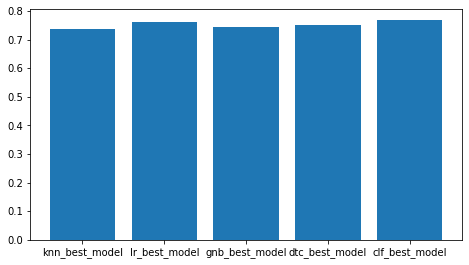

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,0,1,0.80])
algo=['knn_best_model','lr_best_model','gnb_best_model','dtc_best_model','clf_best_model']
accuracy_score = [knn_best_model.best_score_,lr_best_model.best_score_,gnb_best_model.best_score_,dtc_best_model.best_score_,clf_best_model.best_score_]
ax.bar(algo,accuracy_score)
plt.show()

## ANALYSE

Nous remarquons que l'algorithme avec le meilleur score est le random forest. cela s'explique par le fait qu'il 
--> est nettement plus precis que la plupart des classificateurs non lineaires
--> ne fait pas face au probleme de surajustement car il prend la moyenne de toutes les predictions, annule les biais et resout ainsi le probleme de surajustement 
Le random forest est plus perfomant que le decision tree classifier car il est une amelioration de ce dernier.
Le deuxieme algorithme est la regression logistique cela s'explique du fait que cette derniére etait trés utilisé avant l'avenement des réseaux de neurones, Dans cette figure elle a un score tres proche de celui du random forest.